In [1]:
import torch
import torchvision
from torchvision import transforms, datasets

train = datasets.MNIST('', train=True, download=True, transform=transforms.Compose([
                                                                                    transforms.ToTensor()
                                      ]))

test = datasets.MNIST('', train=False, download=True, transform=transforms.Compose([transforms.ToTensor()]))



Extracting MNIST/raw/train-images-idx3-ubyte.gz to MNIST/raw



Extracting MNIST/raw/train-labels-idx1-ubyte.gz to MNIST/raw



Extracting MNIST/raw/t10k-images-idx3-ubyte.gz to MNIST/raw



Extracting MNIST/raw/t10k-labels-idx1-ubyte.gz to MNIST/raw
Processing...
Done!


In [0]:
trainset = torch.utils.data.DataLoader(train, batch_size=10, shuffle=True)
testset = torch.utils.data.DataLoader(test, batch_size=10, shuffle=False)

In [3]:
train

Dataset MNIST
    Number of datapoints: 60000
    Root location: 
    Split: Train
    StandardTransform
Transform: Compose(
               ToTensor()
           )

In [4]:
trainset

In [16]:
import numpy as np
print(trainset.batch_size)
print(len(trainset))
for i, data in enumerate(trainset):
  print(i, type(data))
  print(len(data))
  print(len(data[0]), len(data[1]))
  break

10
6000
0 <class 'list'>
2
10 10


In [0]:
X, y = data[0][0], data[1][0]

In [18]:
print(data[1])

tensor([4, 9, 4, 4, 6, 2, 8, 4, 4, 3])


(1, 28, 28)


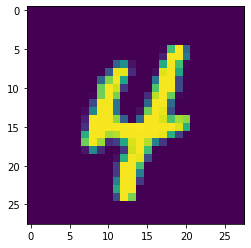

In [22]:
print(np.array(data[0][0]).shape)

import matplotlib.pyplot as plt

plt.imshow(data[0][0].view(28, 28))
plt.show()

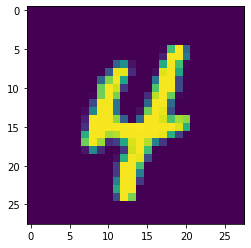

In [24]:
plt.imshow(data[0][0].squeeze())
plt.show()

In [27]:
data[0][0][0][10]

tensor([0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.7765, 0.9882, 0.9294, 0.1686, 0.0000, 0.0000, 0.0000, 0.7294, 0.9882,
        0.9882, 0.2157, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000])

In [30]:
total = 0
counter_dict = {0:0, 1:0, 2:0, 3:0, 4:0, 5:0, 6:0, 7:0, 8:0, 9:0}

for data in trainset:
  Xs, ys = data
  for y in ys:
    counter_dict[int(y)] += 1
    total += 1

print(counter_dict)

for i in counter_dict:
  print(f"{i}: {counter_dict[i]/total*100.0}%")

{0: 5923, 1: 6742, 2: 5958, 3: 6131, 4: 5842, 5: 5421, 6: 5918, 7: 6265, 8: 5851, 9: 5949}
0: 9.871666666666666%
1: 11.236666666666666%
2: 9.93%
3: 10.218333333333334%
4: 9.736666666666666%
5: 9.035%
6: 9.863333333333333%
7: 10.441666666666666%
8: 9.751666666666667%
9: 9.915000000000001%


In [0]:
import torch.nn as nn
import torch.nn.functional as F

In [3]:
class Net(nn.Module):
  def __init__(self):
    super().__init__()

net = Net()
print(net)   

Net()


In [4]:
class a:
  def __init__(self):
    print("initializing a")
  
class b(a):
  def __init__(self):
    print("initializing b")

class c(a):
  def __init__(self):
    super().__init__()
    print("initializing c")

b_ob = b()

initializing b


In [5]:
c_ob = c()

initializing a
initializing c


In [8]:
class Net(nn.Module):
  def __init__(self):
    super().__init__()
    self.fc1 = nn.Linear(28*28, 64)
    self.fc2 = nn.Linear(64, 64)
    self.fc3 = nn.Linear(64, 64)
    self.fc4 = nn.Linear(64, 10)
  
  def forward(self, x):
    x = F.relu(self.fc1(x))
    x = F.relu(self.fc2(x))
    x = F.relu(self.fc3(x))
    x = self.fc4(x)
    return F.log_softmax(x, dim=1)

net = Net()
print(net)

Net(
  (fc1): Linear(in_features=784, out_features=64, bias=True)
  (fc2): Linear(in_features=64, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=64, bias=True)
  (fc4): Linear(in_features=64, out_features=10, bias=True)
)
